In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [9]:
#reads the HappyIndex and WalkScore files and saves them in a list
HappyIndex = pd.read_csv("HappyIndex.csv")
WalkScore = pd.read_csv("WalkScore.csv")

#creates an empty dictionary to hold all the city data
citydata = {}

#goes through the WalkScore list and makes the names of all the cities the keys in the dictionary and makes the values the walk score of that city
for i in range(len(WalkScore)):
    citydata[WalkScore['ScoreCity'][i]] = [WalkScore['WalkScore'][i]]

#first for loop iterates through the length of the HappyIndex list and adds all the city names in the happy list
#second for loop goes through all the keys in the dictionary
for i in range(len(HappyIndex)):
    happy = HappyIndex['HappyCity'][i]
    for city in citydata.keys():
        #if the name of the city in happy is the same as the key then append the Happy Index and Income Ranking to the dictionary preventing duplicates 
        if city in happy:
            citydata[city].append(HappyIndex['Happy Index'][i])
            citydata[city].append(HappyIndex['Income'][i])

#create a new dictionary that only has cities in both the WalkScore and HappyIndex files
updatedcities = {}
for city in citydata:
    if (len(citydata[city]) == 3):
        updatedcities[city] = citydata[city]

#prints the updatedcities dictionary and its length
print(updatedcities)
print(len(updatedcities))

#creates new lists to hold the happyscores, walkscores, and incomescores so we can use them for graphing
happyscores = []
walkscores = []
incomescores = []

#iterates through the dictionary's values and adds the values to the corresponding list
for i in updatedcities.values():
    walkscores.append(i[0])
    happyscores.append(i[1])
    incomescores.append(i[2])

{'New York': [88.0, 57.99, 152], 'Los Angeles': [68.6, 56.02, 81], 'Chicago': [77.2, 56.72, 174], 'Houston': [47.5, 48.83, 145], 'Philadelphia': [74.8, 45.63, 128], 'Phoenix': [41.4, 51.2, 111], 'San Antonio': [36.9, 46.23, 112], 'San Diego': [53.3, 63.98, 28], 'Dallas': [46.0, 49.23, 99], 'San Jose': [50.5, 70.35, 3], 'Jacksonville': [25.6, 51.2, 103], 'Indianapolis': [31.0, 44.72, 167], 'San Francisco': [88.7, 68.73, 8], 'Austin': [41.7, 58.87, 26], 'Fort Worth': [34.9, 51.01, 119], 'Charlotte': [26.4, 59.29, 70], 'Detroit': [51.1, 30.6, 178], 'El Paso': [40.4, 50.18, 151], 'Memphis': [35.0, 35.48, 182], 'Baltimore': [64.3, 45.18, 172], 'Boston': [82.8, 59.28, 9], 'Seattle': [74.4, 65.59, 4], 'Denver': [61.2, 57.96, 104], 'Milwaukee': [61.5, 51.31, 171], 'Oklahoma City': [34.1, 48.16, 146], 'Albuquerque': [42.6, 49.04, 98], 'Tucson': [43.2, 47.83, 93], 'Fresno': [46.6, 49.14, 55], 'Sacramento': [49.0, 59.51, 10], 'Long Beach': [73.3, 55.46, 123], 'Kansas City': [35.3, 45.84, 127], 'M

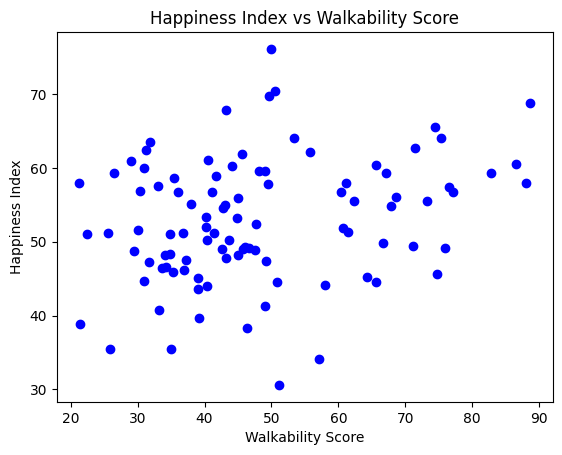

In [10]:
#plotting walkability against happiness

plt.scatter(walkscores, happyscores, c ="blue")
plt.title('Happiness Index vs Walkability Score')
plt.xlabel('Walkability Score')
plt.ylabel('Happiness Index')
plt.show()

There appears to be an positive correlation between higher walkability and more emotional happiness, albeit there are some outliers as expected. 

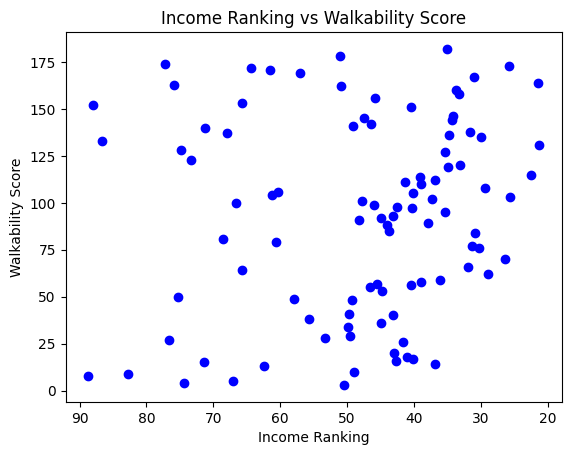

In [11]:
#plotting income against walkability 

plt.scatter(walkscores, incomescores, c ="blue")
plt.title('Income Ranking vs Walkability Score')
plt.xlabel('Income Ranking')
plt.ylabel('Walkability Score')
plt.gca().invert_xaxis()
plt.show()

The graph illustrates that higher incomes correlate with more walkability, and lower incomes tend to have less walkability. In order to create this visualization, it was necessary to invert the x-axis because lower incomes have a higher ranking, and vice versa. For example, a region ranked #1 would have the highest income, whereas a region ranked 90 would have the lowest income.

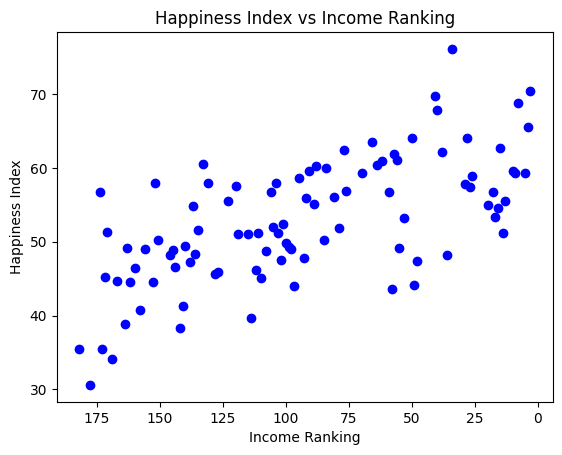

In [12]:
#plotting income against happiness

plt.scatter(incomescores, happyscores, c ="blue")
plt.title('Happiness Index vs Income Ranking')
plt.xlabel('Income Ranking')
plt.ylabel('Happiness Index')
plt.gca().invert_xaxis()
plt.show()

The graph shows a strong correlation between income ranking and happiness, where higher income regions tend to have more happiness. It was necessary to invert the income x-axis as lower incomes are represented by higher rankings (ranking #1 having the most income and ranking #175 having the least).